In [1]:
import pandas as pd 
import numpy as np
import regex as re
from datetime import date, datetime, timedelta 
import requests 
import seaborn as sns
import src

In [2]:
#abrimos el archivo y leemos los datos con todas las columnas
attacks = pd.read_csv('attacks.csv', encoding = 'latin1')
pd.options.display.max_columns = None
attacks

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#revisamos el estado de los datos y qué tipo de información tiene
attacks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

### Limpieza de nulos

In [4]:
# Vemos que hay columnas con pocos valores así que 
#eliminamos las columnas con 1 o 2 valores no nulos
attacks.drop(columns = ['Unnamed: 22', 'Unnamed: 23'], inplace = True)
attacks

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# eliminamos filas sin información: con todos los valores nulos
attacks.dropna(how = "all", inplace = True)
attacks.tail(15)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
8688,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8689,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8690,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8691,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8692,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8693,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8694,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8695,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8696,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8697,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Al ver que aun hay filas con solo 1 valor que no aportan nada, eliminamos las filas que tengas más de 21 nulos, considerando que hay 22 columnas
attacks.dropna(thresh=21, inplace =True)
attacks

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6239,ND.0068,Before 1962,0.0,Unprovoked,MOZAMBIQUE,Maputo Province,Santa Maria Peninsula,Skindiving,Les Bishop,M,36,Bumped by sharks,N,NaN,"""A pack of sharks""",L. Bishop; V.M. Coppleson (1962),ND-0068-LesBishop.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0068,ND.0068,64.0
6241,ND.0065,1960s,0.0,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River,Fishing from a small boat & put his hand in th...,male,M,25,Right hand severed,N,Afternoon,NaN,B.W. Coad & L.A.J. Al-Hassan,ND-0065-deadfish.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0065,ND.0065,62.0
6242,ND.0064,1960s,0.0,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River,Swimming naked near a date palm where many dat...,male,M,6,Arm severed,N,Afternoon,Bull shark,B.W. Coad & L.A.J. Al-Hassan,ND-0064-Shatt-al-Arab.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0064,ND.0064,61.0
6243,ND.0063,1960s,0.0,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River near Abu al Khasib,Swimming in section of river used for washing ...,male,M,16,Right leg lacerated & surgically amputated,N,Afternoon,Bull shark,B.W. Coad & L.A.J. Al-Hassan,ND-0063-Shatt-al-Arab.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0063,ND.0063,60.0


In [7]:
# Revisamos de nuevo el estado del DataFrame 
attacks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 0 to 6265
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             2938 non-null   object 
 1   Date                    2938 non-null   object 
 2   Year                    2938 non-null   float64
 3   Type                    2938 non-null   object 
 4   Country                 2938 non-null   object 
 5   Area                    2924 non-null   object 
 6   Location                2928 non-null   object 
 7   Activity                2923 non-null   object 
 8   Name                    2937 non-null   object 
 9   Sex                     2930 non-null   object 
 10  Age                     2713 non-null   object 
 11  Injury                  2938 non-null   object 
 12  Fatal (Y/N)             2856 non-null   object 
 13  Time                    2499 non-null   object 
 14  Species                 2218 non-null   

In [8]:
#contamos los nulos por columna
attacks.isnull().sum().sort_values()

Case Number                 0
Case Number.1               0
href                        0
href formula                0
pdf                         0
Injury                      0
Case Number.2               0
original order              0
Country                     0
Type                        0
Year                        0
Date                        0
Name                        1
Investigator or Source      2
Sex                         8
Location                   10
Area                       14
Activity                   15
Fatal (Y/N)                82
Age                       225
Time                      439
Species                   720
dtype: int64

### Limpieza de columnas repetidas

In [9]:
# Ahora que el data frame está más limpio de "filas nulas", podemos ver si hay columnas con valores repetidos que se puedan limpiar
prueba1 = attacks[['Case Number','Case Number.1']]

In [10]:
# Se mostrará los elementos que no sean idénticos en ambas columnas, que en este caso resultan ser 10
prueba1.loc[prueba1['Case Number'] != prueba1['Case Number.1']]

,Case Number,Case Number.1
34,2018.04.03,2018.04.02
117,2017.07.20.a,2017/07.20.a
144,2017.05.06,2017.06.06
314,2016.01.24.b,2015.01.24.b
334,2015.12.23,2015.11.07
339,2015.10.28.a,2015.10.28
390,2015.07-10,2015.07.10
3522,1967.07.05,1967/07.05
3880,1961.09.02.R,"1961.09,06.R"
4403,1952.08.05,1952.08.04


In [11]:
# Se hace el mismo proceso ahora con las columnas 'Case Number' y 'Case Number.2'
prueba2 = attacks[['Case Number','Case Number.2']]

In [12]:
# Se mostrará los elementos que no sean idénticos en ambas columnas, que en este caso resultan ser solo 1
prueba2.loc[prueba2['Case Number'] != prueba2['Case Number.2']]

,Case Number,Case Number.2
390,2015.07-10,2015.07.10


In [13]:
# Se hace el mismo proceso ahora con las columnas 'Case Number.1' y 'Case Number.2'
prueba3 = attacks[['Case Number.1','Case Number.2']]

In [14]:
# Se mostrará los elementos que no sean idénticos en ambas columnas, que en este caso resultan ser 9
prueba3.loc[prueba3['Case Number.1'] != prueba3['Case Number.2']]

,Case Number.1,Case Number.2
34,2018.04.02,2018.04.03
117,2017/07.20.a,2017.07.20.a
144,2017.06.06,2017.05.06
314,2015.01.24.b,2016.01.24.b
334,2015.11.07,2015.12.23
339,2015.10.28,2015.10.28.a
3522,1967/07.05,1967.07.05
3880,"1961.09,06.R",1961.09.02.R
4403,1952.08.04,1952.08.05


In [15]:
# Comprobamos que las 3 columnas tienen los mismos valores, con la diferencia de los 10 valores anteriores que siguen siendo duplicados (errores de puntuación)
# Además vemos que los datos en estas columnas corresponden a la fecha, ya contenida en otra columna

# eliminamos las columnas con muchos valores duplicados
attacks.drop(columns = ['Case Number', 'Case Number.1', 'Case Number.2'], inplace = True)
attacks.head(10)

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,original order
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0
6,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6297.0
7,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6296.0
8,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6295.0
9,26-May-2018,2018.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Standing,male,M,12,Minor injury to foot,N,14h00,NaN,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6294.0
10,24-May-2018,2018.0,Provoked,AUSTRALIA,Queensland,Cairns Aquarium,Feeding sharks,male,M,32,Minor bite to hand by captive shark. PROVOKED ...,N,Morning,Grey reef shark,"ABC.net.au ,05/24/2018",2018.05.24-CairnsAquarium.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6293.0
12,13-May-2018,2018.0,Unprovoked,USA,South Carolina,"Hilton Head Island, Beaufort County",Swimming,Jei Turrell,M,10,Severe bite to right forearm,N,15h00,NaN,"C. Creswell, GSAF & K. McMurray TrackingSharks...",2018.05.13.b-Turrell.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6291.0
13,13-May-2018,2018.0,Invalid,ENGLAND,Cornwall,Off Land's End,Fishing,Max Berryman,M,21,Injured by teeth of a dead porbeagle shark he ...,N,08h15,Invalid incident,"K. McMurray, TrackingSharks.com",2018.05.13.a-Berryman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6290.0


In [16]:
# Aparentemente, las colummnas 'href formula' y 'href' también tienen elementos duplicados por lo cual se hace el mismo proceso
prueba4 = attacks[['href formula','href']]

In [17]:
# Se mostrará los elementos que no sean idénticos en ambas columnas
prueba5 = prueba4.loc[prueba4['href formula'] != prueba4['href']]
prueba5

,href formula,href
50,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
96,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
133,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
168,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
234,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
276,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
324,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
332,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
352,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...
401,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...


In [18]:
#creamos una función /e importamos/ para comprobar si los links son válidos

# aplicamos la función a los registros diferentes de ambas columnas y revisamos cuantos URL invalidos tenemos  
prueba6 = prueba5['href formula'].apply(src.Check_URL)

Invalid URL 'pdf-directory/2013.05.27.b-Ena.pdf': No schema supplied. Perhaps you meant http://pdf-directory/2013.05.27.b-Ena.pdf?


In [19]:
prueba7 = prueba5['href'].apply(src.Check_URL)

In [20]:
#creamos una serie con los valores inavlidos de la columna 'href formula', eliminando los valores nulos luego de aplicar la función
prueba6.dropna(inplace = True)
prueba6

96      (URL invalid, : , http://sharkattackfile.net/s...
332     (URL invalid, : , http://sharkattackfile.net/s...
486     (URL invalid, : , http://sharkattackfile.net/s...
493     (URL invalid, : , http://sharkattackfile.net/s...
494     (URL invalid, : , http://sharkattackfile.net/s...
515     (URL invalid, : , http://sharkattackfile.net/s...
1046    (URL invalid, : , http://sharkattackfile.net/s...
Name: href formula, dtype: object

In [21]:
# creamos una serie para la columna 'href'
prueba7.dropna(inplace = True)
prueba7

50      (URL invalid, : , http://sharkattackfile.net/s...
96      (URL invalid, : , http://sharkattackfile.net/s...
133     (URL invalid, : , http://sharkattackfile.net/s...
168     (URL invalid, : , http://sharkattackfile.net/s...
234     (URL invalid, : , http://sharkattackfile.net/s...
276     (URL invalid, : , http://sharkattackfile.net/s...
324     (URL invalid, : , http://sharkattackfile.net/s...
332     (URL invalid, : , http://sharkattackfile.net/s...
352     (URL invalid, : , http://sharkattackfile.net/s...
401     (URL invalid, : , http://sharkattackfile.net/s...
527     (URL invalid, : , http://sharkattackfile.net/s...
545     (URL invalid, : , http://sharkattackfile.net/s...
569     (URL invalid, : , http://sharkattackfile.net/s...
584     (URL invalid, : , http://sharkattackfile.net/s...
586     (URL invalid, : , http://sharkattackfile.net/s...
590     (URL invalid, : , http://sharkattackfile.net/s...
4154    (URL invalid, : , http://sharkattackfile.net/s...
Name: href, dt

In [22]:
# Comprobamos que la columna 'href formula' tiene menos URL inválidos así que la conservamos
# Si un valor es URL inválido en la columna 'href formula' la sustituimos por el valor de la columna 'href' si este es válido

for i in prueba6.index :
    if i in prueba7.index:
        attacks['href formula'][i] = attacks['href formula'][i]
    else:
        attacks['href formula'][i]= attacks['href'][i]

C:\Users\monan\AppData\Local\Temp/ipykernel_412/1853777208.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attacks['href formula'][i] = attacks['href formula'][i]
C:\Users\monan\AppData\Local\Temp/ipykernel_412/1853777208.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attacks['href formula'][i]= attacks['href'][i]


In [23]:
#Ya sustituidos los valores, eliminamos la columna 'href'
attacks.drop(columns = ['href'], inplace = True)

### Conversión a datos numéricos

In [24]:
# Al ver que hay columnas con datos numéricos sin el formato adecuado, comenzamos a limpiarlas:

# Convertimos la columna 'Year' que nos interesa tratar como numerica a enteros
attacks['Year'] = attacks['Year'].astype(int)

In [25]:
#Antes de convertir la columna 'Age' a numerica, limpiamos de caracteres no numericos

# Para esto creamos e importamos una funciónpara limpiar de caracteres no numericos 

attacks['Age'] = attacks['Age'].apply(src.value_to_num)


In [26]:
#Despues de limpiar lo pasamos a dato numérico, convirtiendo los nulos en -1
attacks['Age'] = pd.to_numeric(attacks['Age'], errors= 'coerce')
attacks['Age'] = attacks['Age'].fillna(-1).astype(int)
attacks['Age']

0       57
1       11
2       48
6       18
7       52
        ..
6239    36
6241    25
6242     6
6243    16
6265    13
Name: Age, Length: 2938, dtype: int32

### Conversión de fechas

In [27]:
#Tomamos la columna 'Date' y eliminamos las palabras adiconales en los datos que "ensusian" la información
attacks['Date'] = attacks['Date'].apply(lambda x: re.sub('Before' and 'Reported' , '', x))
attacks['Date'] = attacks['Date'].apply(lambda x: re.sub(' ' , '', x))
attacks['Date'].head(60)

0     25-Jun-2018
1     18-Jun-2018
2     09-Jun-2018
6     03-Jun-2018
7     27-May-2018
8     26-May-2018
9     26-May-2018
10    24-May-2018
12    13-May-2018
13    13-May-2018
14        May2018
16    09-May-2018
18    28-Apr-2018
20    25-Apr-2018
21    25-Apr-2018
22    24-Apr-2018
23    23-Apr-2018
24    22-Apr-2018
25    19-Apr-2018
26    15-Apr-2018
29    15-Apr-2018
30    14-Apr-2018
31    10-Apr-2018
33    05-Apr-2018
34    03-Apr-2018
35    31-Mar-2018
36    14-Mar-2018
37     9-Mar-2018
38     9-Mar-2018
39    24-Feb-2018
40    23-Feb-2018
41    18-Feb-2018
42    15-Feb-2018
43    14-Feb-2018
44    11-Feb-2018
45    03-Feb-2018
46    01-Feb-2018
47    28-Jan-2018
48    21-Jan-2018
49    14-Jan-2018
50    13-Jan-2018
51    12-Jan-2018
53    31-Dec-2017
54    30-Dec-2017
55    21-Dec-2017
57    30-Nov-2017
58    30-Nov-2017
60    24-Nov-2017
61    18-Nov-2017
63    13-Nov-2017
64    04-Nov-2017
65    31-Oct-2017
66    28-Oct-2017
69    23-Oct-2017
70    23-Oct-2017
71    22-O

In [28]:
# Creamos e importamos una función para encontrar las fechas dentro de los datos y convertirlos a formato tipo 'datetime'

attacks['Date'] = attacks['Date'].apply(src.fecha_limpia)

#luego de aplicar la función vemos el estado de los datos en las primera filas
attacks['Date'][0:60] 

0     2018-06-25
1     2018-06-18
2     2018-06-09
6     2018-06-03
7     2018-05-27
8     2018-05-26
9     2018-05-26
10    2018-05-24
12    2018-05-13
13    2018-05-13
14    2018-05-01
16    2018-05-09
18    2018-04-28
20    2018-04-25
21    2018-04-25
22    2018-04-24
23    2018-04-23
24    2018-04-22
25    2018-04-19
26    2018-04-15
29    2018-04-15
30    2018-04-14
31    2018-04-10
33    2018-04-05
34    2018-04-03
35    2018-03-31
36    2018-03-14
37    1000-01-01
38    1000-01-01
39    2018-02-24
40    2018-02-23
41    2018-02-18
42    2018-02-15
43    2018-02-14
44    2018-02-11
45    2018-02-03
46    2018-02-01
47    2018-01-28
48    2018-01-21
49    2018-01-14
50    2018-01-13
51    2018-01-12
53    2017-12-31
54    2017-12-30
55    2017-12-21
57    2017-11-30
58    2017-11-30
60    2017-11-24
61    2017-11-18
63    2017-11-13
64    2017-11-04
65    2017-10-31
66    2017-10-28
69    2017-10-23
70    2017-10-23
71    2017-10-22
72    2017-10-21
73    2017-10-18
74    2017-10-

In [29]:
#limpiamos de igual forma la columna de Time. Comenzamos llenando los valores nulos
attacks['Time'].fillna('00h00', inplace = True)

In [30]:
# Creamos e importamos una función para convertir los valores de la fila a horas 
# Aplicamos la funcion 
attacks['Time']= attacks['Time'].apply(src.hora_limpia)

In [31]:
attacks['Time']

0       18:00:00
1       00:00:00
2       07:45:00
6       15:00:00
7       00:00:00
          ...   
6239    00:00:00
6241    14:00:00
6242    14:00:00
6243    14:00:00
6265    14:00:00
Name: Time, Length: 2938, dtype: object

In [32]:
attacks['Time'].isna().sum() #chequeamos y no hay nulos

0

### Limpieza columnas

In [33]:
# Creamos un nuevo índice para el DataFrame, ya que el anterior tiene elementos eliminados por la limpieza previa

attacks["index"]=[i for i in range(len(attacks["Activity"]))]
attacks.set_index("index", inplace = True)
attacks

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,original order
index,,,,,,,,,,,,,,,,,,
0,2018-06-25,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18:00:00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0
1,2018-06-18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,00:00:00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0
2,2018-06-09,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07:45:00,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0
3,2018-06-03,2018,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,15:00:00,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6297.0
4,2018-05-27,2018,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,00:00:00,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,6296.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,1000-01-01,0,Unprovoked,MOZAMBIQUE,Maputo Province,Santa Maria Peninsula,Skindiving,Les Bishop,M,36,Bumped by sharks,N,00:00:00,"""A pack of sharks""",L. Bishop; V.M. Coppleson (1962),ND-0068-LesBishop.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,64.0
2934,1000-01-01,0,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River,Fishing from a small boat & put his hand in th...,male,M,25,Right hand severed,N,14:00:00,NaN,B.W. Coad & L.A.J. Al-Hassan,ND-0065-deadfish.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,62.0
2935,1000-01-01,0,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River,Swimming naked near a date palm where many dat...,male,M,6,Arm severed,N,14:00:00,Bull shark,B.W. Coad & L.A.J. Al-Hassan,ND-0064-Shatt-al-Arab.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,61.0


In [34]:
#Eliminamos las columnas con datos irrelevantes para el análisis. 
attacks.drop (['Investigator or Source', 'pdf','original order'], axis = 1, inplace = True)
attacks

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,href formula
index,,,,,,,,,,,,,,,
0,2018-06-25,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18:00:00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018-06-18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,00:00:00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2018-06-09,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07:45:00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...
3,2018-06-03,2018,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,15:00:00,Tiger shark,http://sharkattackfile.net/spreadsheets/pdf_di...
4,2018-05-27,2018,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,00:00:00,"Lemon shark, 3'",http://sharkattackfile.net/spreadsheets/pdf_di...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,1000-01-01,0,Unprovoked,MOZAMBIQUE,Maputo Province,Santa Maria Peninsula,Skindiving,Les Bishop,M,36,Bumped by sharks,N,00:00:00,"""A pack of sharks""",http://sharkattackfile.net/spreadsheets/pdf_di...
2934,1000-01-01,0,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River,Fishing from a small boat & put his hand in th...,male,M,25,Right hand severed,N,14:00:00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...
2935,1000-01-01,0,Unprovoked,IRAQ,Basrah,Shatt-al-Arab River,Swimming naked near a date palm where many dat...,male,M,6,Arm severed,N,14:00:00,Bull shark,http://sharkattackfile.net/spreadsheets/pdf_di...


In [35]:
# Arreglamos los nombres de las columnas y las ordenamos para que los datos sean más faciles de ubicar
attacks.rename(columns= {'Sex ': 'Sex', 'Species ': 'Species'}, inplace = True)
attacks = attacks.reindex (columns = ['Type', 'Date', 'Year', 'Time','Name', 'Sex', 'Age', 'Country', 'Area', 'Location', 'Activity', 'Injury', 'Fatal (Y/N)', 'Species', 'href formula'])

In [36]:
# Limpiamos la fila 'Type' que tiene elementos mal escritos

attacks['Type'] = attacks['Type'].str.replace('Boating','Boat')
attacks['Type'].value_counts()   # Nos quedan finalmente 6 tipos de ataques

Unprovoked      2514
Provoked         247
Invalid           99
Boat              55
Sea Disaster      21
Questionable       2
Name: Type, dtype: int64

In [37]:
# Limpiamos la columna 'Name'
attacks['Name'].value_counts()

male                 162
female                44
Arab boy               3
boy                    3
Andre Hartman          3
                    ... 
a male from Miami      1
Kevin Spradlin         1
Ivan Gerger            1
Lance Cameron          1
Les Bishop             1
Name: Name, Length: 2714, dtype: int64

In [38]:
# Reemplazamos los elementos erróneos por 'unknown'
attacks['Name'] = attacks['Name'].str.replace('a male from Miami','Unknown')
attacks['Name'] = attacks['Name'].str.replace('female','Unknown')
attacks['Name'] = attacks['Name'].str.replace('male','Unknown')
attacks['Name'] = attacks['Name'].str.replace('Arab boy','Unknown')
attacks['Name'] = attacks['Name'].str.replace('boy','Unknown')
attacks['Name'] = attacks['Name'].str.replace('girl','Unknown')

In [39]:
# Comprobamos que solo quedan nombres propios y elementos 'Unknown'
attacks['Name'].value_counts()

Unknown           215
Andre Hartman       3
Gary Johnson        2
Andy Austin         2
Hideo Ishida        2
                 ... 
Kevin Spradlin      1
Ivan Gerger         1
Lance Cameron       1
Tim West            1
Les Bishop          1
Name: Name, Length: 2709, dtype: int64

In [40]:
# Empezamos a limpiar la fila 'Activity' reemplazando los elementos vacíos por 'No Activity'

attacks["Activity"].fillna("No Activity",inplace=True)

In [41]:
attacks['Activity']= attacks["Activity"].apply(lambda x: x.lower())   # Pasamos todo a minúsculas para un mejor parsing

dicc1 = {'surfing':'surf','surfng':'surf','swimming':'swim','spearing':'spearfish','speared':'spearfish','wading':'wade','fishing':'fish','standing':'stand','snorkeling':'snorkel','paddling':'paddle','bathing':'bathe','boogie boarding':'boogie-board','boogie-boarding':'boogie-board','walking':'walk','paddle boarding':'paddle','bodyboarding':'surf','body-boarding':'surf','body surfing':'surf','dived':'dive','diving':'dive','scuba dive':'scuba-dive','kayaking ':'kayak'}

for i,j in dicc1.items():
    attacks['Activity'] = attacks['Activity'].str.replace(i,j)

In [42]:
# Creamos una lista con todas las palabras existentes en la columna Activity para así poder contar únicamente las actividades de interés (verbos)
# sin importar las palabras que puedan existir en el mismo string (como conectores o sustantivos)

l1=[]

for i in attacks["Activity"]:
    for j in i.split(" "):
        l1.append(j)

In [43]:
# Analizamos la frecuencia de las actividades que consideramos relevantes para esta investigación

cont_freq= 0
set1=set(dicc1.values())
for i in set1:
    cont_freq+=l1.count(i)
    print(i,l1.count(i))


# Tenemos 2615 actividades principales de las 2938 totales, que representa un 89%, donde el 11% restante representa a los outliers
cont_freq

wade 141
surf 877
swim 570
snorkel 76
paddle 22
fish 218
bathe 41
scuba-dive 81
spearfish 254
dive 158
kayak 18
walk 23
boogie-board 42
stand 94


2615

In [44]:
# Empezamos a limpiar la fila 'Country' que tiene algunos elementos duplicados y mal escritos

attacks['Country'].value_counts()


USA                   1383
AUSTRALIA              636
SOUTH AFRICA           354
BAHAMAS                 49
NEW ZEALAND             47
                      ... 
MALAYSIA                 1
GRAND CAYMAN             1
NEW GUINEA               1
DOMINICAN REPUBLIC       1
BARBADOS                 1
Name: Country, Length: 103, dtype: int64

In [45]:
# Reemplazamos los valores correctos

attacks['Country'] = attacks['Country'].str.replace('COLUMBIA','COLOMBIA')
attacks['Country'] = attacks['Country'].str.replace('EGYPT ','EGYPT')
attacks['Country'] = attacks['Country'].str.replace('UNITED ARAB EMIRATES (UAE)','UNITED ARAB EMIRATES')
attacks['Country'] = attacks['Country'].str.replace(' TONGA','TONGA')
attacks['Country'] = attacks['Country'].str.replace('OKINAWA','JAPAN')
attacks['Country'] = attacks['Country'].str.replace('AMERICAN SAMOA','SAMOA')
attacks['Country'] = attacks['Country'].str.replace('WESTERN SAMOA','SAMOA')
attacks['Country'] = attacks['Country'].str.replace('EGYPT/ ISRAEL ','EGYPT')
attacks['Country'] = attacks['Country'].str.replace('UNITED ARAB EMIRATES (UAE)','UNITED ARAB EMIRATES')

C:\Users\monan\AppData\Local\Temp/ipykernel_412/870818225.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks['Country'] = attacks['Country'].str.replace('UNITED ARAB EMIRATES (UAE)','UNITED ARAB EMIRATES')
C:\Users\monan\AppData\Local\Temp/ipykernel_412/870818225.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  attacks['Country'] = attacks['Country'].str.replace('UNITED ARAB EMIRATES (UAE)','UNITED ARAB EMIRATES')


In [46]:
#Limpiamos la columna 'Sex'
attacks["Sex"].fillna("Genderless",inplace=True) # Se sustituyen los valores vacios por "Genderless"

attacks["Sex"].value_counts() # Inspeccionamos los valores contenidos en la columna 


M             2522
F              406
Genderless       8
M                1
lli              1
Name: Sex, dtype: int64

In [47]:
# Se reemplazan los espacios en blanco " " por vacio
attacks['Sex'] = attacks['Sex'].str.replace(' ','')
# Cambiamos "lli" por genderless
attacks['Sex'] = attacks['Sex'].str.replace('lli','Genderless')

In [48]:
attacks["Sex"].value_counts() 

M             2523
F              406
Genderless       9
Name: Sex, dtype: int64

In [49]:
# inspeccionamos la columna de fatalidad para poder limpiarla
attacks['Fatal (Y/N)'].value_counts()

N          2392
Y           456
 N            4
UNKNOWN       2
M             1
2017          1
Name: Fatal (Y/N), dtype: int64

In [50]:
# Reemplazamos los valores mal escritos por los correctos para normalizar los datos
attacks['Fatal (Y/N)'] = attacks['Fatal (Y/N)'].str.replace(' N','N')
attacks['Fatal (Y/N)'] = attacks['Fatal (Y/N)'].str.replace('M','N')
attacks['Fatal (Y/N)'] = attacks['Fatal (Y/N)'].str.replace('2017','UNKNOWN')
attacks['Fatal (Y/N)'].value_counts()

N          2397
Y           456
UNKNOWN       3
Name: Fatal (Y/N), dtype: int64

In [51]:
# Limpiamos la columna de Especies
attacks['Species'].unique()

array(['White shark', nan, 'Tiger shark', ..., "16' shark",
       "Nurse shark, 2.1 m [7'] ", '"A pack of sharks"'], dtype=object)

In [52]:
# Los valosres nulos los marcamos como desconocidos
attacks["Species"].fillna("Unknown",inplace=True)
attacks["Species"]

index
0              White shark
1                  Unknown
2                  Unknown
3              Tiger shark
4          Lemon shark, 3'
               ...        
2933    "A pack of sharks"
2934               Unknown
2935            Bull shark
2936            Bull shark
2937            Bull shark
Name: Species, Length: 2938, dtype: object

In [53]:
attacks['Species']= attacks["Species"].astype(str).apply(lambda x: x.lower())   
# Pasamos todo a minúsculas para un mejor parsing

In [54]:
# creamos una función para normalizar los valores dentro de l columna y agrupar las especies que más se repiten mejor

#aplicamos la función y vemos que los resultados están más limpios y tenemos mejor visibilidad de las especies
attacks['Species'] = attacks['Species'].apply(src.Species_limpia)
attacks['Species'].value_counts().head(60)

unknown                                               721
white shark                                           481
tiger shark                                           205
bull shark                                            138
nurse shark                                            68
blacktip shark                                         58
bronze whaler shark                                    49
reef shark                                             47
small shark                                            41
4' shark                                               37
raggedtooth shark                                      36
shark involvement not confirmed                        32
1.8 m [6'] shark                                       30
6' shark                                               30
mako shark                                             25
1.2 m [4'] shark                                       23
blue shark                                             22
3' shark      

## Respondemos a preguntas sencillas 

1. ¿Donde ocurren la mayoría de los ataques? 

In [55]:
attacks['Country'].value_counts()

USA               1383
AUSTRALIA          636
SOUTH AFRICA       354
BAHAMAS             49
NEW ZEALAND         47
                  ... 
BRITISH ISLES        1
TURKEY               1
PACIFIC OCEAN        1
NEW GUINEA           1
BARBADOS             1
Name: Country, Length: 99, dtype: int64

In [56]:
# Vemos que los países con más ataques son: Estados Unidos, Australia y Suráfrica

In [57]:
attacks['Area'].value_counts()

Florida             731
New South Wales     258
California          199
Hawaii              155
Queensland          154
                   ... 
Nueva Esparta         1
Caroline Islands      1
Cheshire              1
Maryland              1
Southwest coast       1
Name: Area, Length: 348, dtype: int64

In [58]:
attacks['Location'].value_counts()

New Smyrna Beach, Volusia County               147
Daytona Beach, Volusia County                   25
Ponce Inlet, Volusia County                     19
Melbourne Beach, Brevard County                 15
Isle of Palms, Charleston County                11
                                              ... 
Aston Bay                                        1
Flinders                                         1
St. Crispin Reef                                 1
Tillamook Head, Clatsop County                   1
Shatt-el Arab River near a small boat stand      1
Name: Location, Length: 2137, dtype: int64

In [59]:
#las columnas de País y Area dan más información al ser más generales y permiten llegar a mejores conclusiones
#usamos estas columnas para ver la información de forma gráfica

<AxesSubplot:>

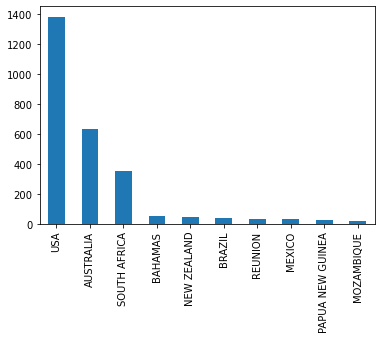

In [60]:
#visualizamos los 10 países con más ataques
attacks['Country'].value_counts().head(10).plot.bar()

¿Donde no ir de vacaciones si no quieres que te muerda un tiburon?

In [61]:
attacks[['Country','Area']].value_counts()[:50]

Country           Area                 
USA               Florida                  731
AUSTRALIA         New South Wales          258
USA               California               199
                  Hawaii                   155
AUSTRALIA         Queensland               154
SOUTH AFRICA      KwaZulu-Natal            128
                  Western Cape Province    114
                  Eastern Cape Province    109
AUSTRALIA         Western Australia         93
USA               South Carolina            79
                  North Carolina            58
AUSTRALIA         South Australia           52
USA               Texas                     43
AUSTRALIA         Victoria                  42
BRAZIL            Pernambuco                31
USA               Oregon                    25
NEW ZEALAND       South Island              21
                  North Island              19
BAHAMAS           Abaco Islands             19
AUSTRALIA         Tasmania                  16
USA               Ne

USA Florida
AUSTRALIA New South Wales
SOUTH AFRICA KwaZulu-Natal
BRAZIL Pernambuco
NEW ZEALAND South Island
BAHAMAS Abaco Islands
MOZAMBIQUE Gaza
MEXICO Guerrero
IRAQ Basrah
NEW CALEDONIA North Province
PAPUA NEW GUINEA Central Province
EGYPT South Sinai Peninsula
ECUADOR Galapagos Islands
INDONESIA Bali
VIETNAM Binh Dinh Province


<AxesSubplot:xlabel='Country,Area'>

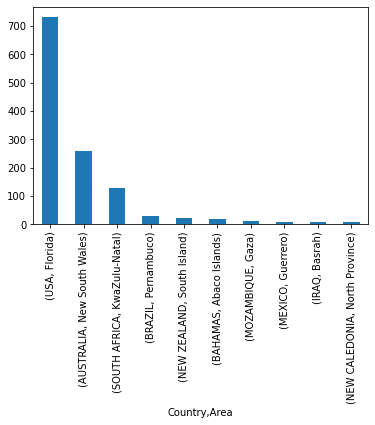

In [62]:
area_country = attacks[['Country','Area']].value_counts()[:50]

paises = []
states = []

for i in area_country.index:
    if i[0] not in paises:
        paises.append(i[0])
        states.append(i[1])
        print(i[0],i[1])

vacaciones = area_country[area_country.index.isin(paises,level=0)&area_country.index.isin(states,level=1)]
# filtrar la seria area_country por aquellos index que estan en paises y states
vacaciones.head(10).plot.bar()

<AxesSubplot:xlabel='Area,Country'>

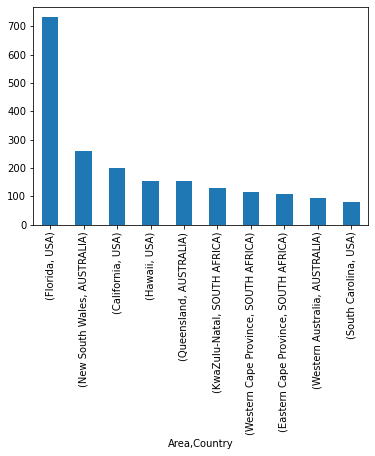

In [63]:
#visualizamos los 10 áreas(con su país) con más ataques 
attacks[['Area', 'Country']].value_counts().head(10).plot.bar()

2. ¿La mayoría de los ataques son provocados o no?

In [64]:
attacks['Type'].value_counts()
#la mayoría son no provocados

Unprovoked      2514
Provoked         247
Invalid           99
Boat              55
Sea Disaster      21
Questionable       2
Name: Type, dtype: int64

<AxesSubplot:>

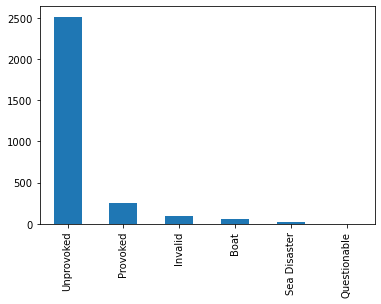

In [65]:
attacks['Type'].value_counts().plot.bar()

In [66]:
# ¿Cuál es el porcentaje de ataques provocados?
attacks['Type'].value_counts(normalize=True)* 100

Unprovoked      85.568414
Provoked         8.407080
Invalid          3.369639
Boat             1.872022
Sea Disaster     0.714772
Questionable     0.068074
Name: Type, dtype: float64

3. ¿Qué tipo de actividad es más peligrosa?

In [67]:
attacks['Activity'].value_counts()

surf                                                                    749
swim                                                                    458
spearfish                                                               202
wade                                                                    117
fish                                                                    115
                                                                       ... 
jumped off rocks into white water                                         1
commercial diver (submerged or treading water)                            1
scuba-dive for bivalves                                                   1
sleeping in anchored boat                                                 1
swim in section of river used for washing clothes & cooking utensils      1
Name: Activity, Length: 587, dtype: int64

4. ¿Cuál es la hora más peligrosa?

In [68]:
attacks['Hour'] = attacks['Time'].apply(lambda x : x.hour)
#attacks['Time'].value_counts() #439 hacer lago más con los nulos que no sea ponerles 0 

In [69]:
attacks[attacks['Hour'] != 0]['Hour'].value_counts()

14    352
15    240
11    219
16    214
13    184
12    175
8     169
17    166
10    159
18    117
9     108
7      60
21     42
19     40
6      28
20     25
23      8
5       8
4       5
2       4
22      2
3       2
1       1
Name: Hour, dtype: int64

<AxesSubplot:>

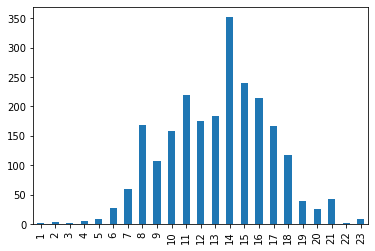

In [70]:
attacks[attacks['Hour'] != 0]['Hour'].value_counts().sort_index().plot.bar() #ordenar horas

In [71]:
attacks['Time']

index
0       18:00:00
1       00:00:00
2       07:45:00
3       15:00:00
4       00:00:00
          ...   
2933    00:00:00
2934    14:00:00
2935    14:00:00
2936    14:00:00
2937    14:00:00
Name: Time, Length: 2938, dtype: object

¿En cuál mes hay más ataques?

In [72]:
attacks['Month'] = attacks['Date'].apply(lambda x : x.month)
attacks['Month'].value_counts()

7     319
8     311
1     305
9     287
6     263
10    241
4     233
12    211
5     198
3     192
11    191
2     187
Name: Month, dtype: int64

<AxesSubplot:xlabel='Month,Country'>

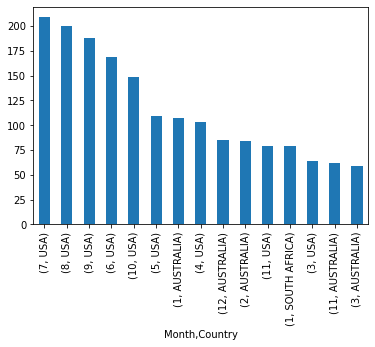

In [73]:
#Podemos visulizar mes por país
attacks[['Month', 'Country']].value_counts().head(15).plot.bar() # --------------> Filtrar mes por país / país por mes 

5. ¿Cuál es la probabilidad de morir si te ataca un tiburón?

In [74]:
# Primero, hayamos la cantidad de muertes debida a ataques de tiburón
attacks['Fatal (Y/N)'].value_counts()

# Del total de 2856 casos, 456 fueron fatales, representando un 15.97% de los casos.

N          2397
Y           456
UNKNOWN       3
Name: Fatal (Y/N), dtype: int64

<AxesSubplot:>

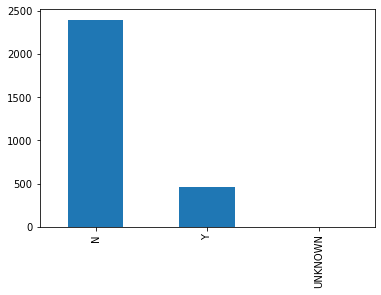

In [75]:
attacks['Fatal (Y/N)'].value_counts().plot.bar()

6. ¿Cuál ha sido el año con más ataques?

In [76]:
attacks['Year'].value_counts()

# El año 2015 es el que tuvo más ataques, 107 en total

2015    107
2016     93
2017     89
2012     87
2007     86
       ... 
1887      1
1889      1
1892      1
1894      1
1877      1
Name: Year, Length: 136, dtype: int64

<AxesSubplot:>

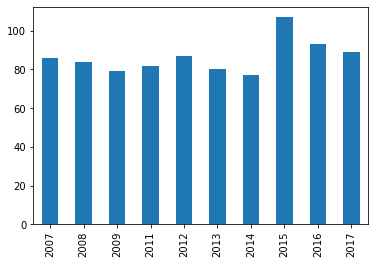

In [77]:
# Mostramos los 10 años con más ataques

attacks['Year'].value_counts().head(10).sort_index().plot.bar()

8. ¿Han disminuido los ataques en los últimos años?

In [78]:
# Ordenamos los últimos 50 años cronológicamente, pero la información quedará más clara de manera visual

attacks['Year'].value_counts().sort_index(ascending=False).head(50)

2018     42
2017     89
2016     93
2015    107
2014     77
2013     80
2012     87
2011     82
2010     68
2009     79
2008     84
2007     86
2006     71
2005     72
2004     67
2003     70
2002     71
2001     59
2000     58
1999     49
1998     41
1997     37
1996     39
1995     37
1994     28
1993     25
1992     34
1991     31
1990     25
1989     33
1988     29
1987     18
1986     20
1985     21
1984     25
1983     30
1982     23
1981     26
1980     19
1979     11
1978      6
1977     11
1976     15
1975     25
1974     22
1973     12
1972     16
1971     14
1970     17
1969     16
Name: Year, dtype: int64

In [79]:
# Como queremos trabajar la columna por décadas, más que como años, asignamos los valores a una década para poder trabajarlo mejor al momento de analizar 

attacks['Decade']= pd.cut (attacks.Year, bins = [0, 1899,1909, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019], labels = ["Siglo XIX", "10's", "20's","30's", "40's", "50's", "60's", "70's", "80's", "90's", "00's", "2010's",])

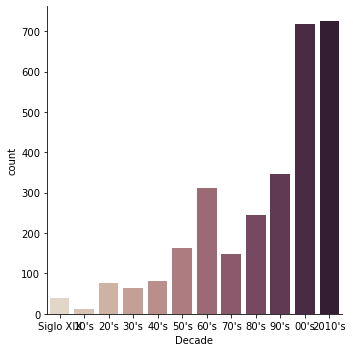

In [80]:
# Se aprecia mejor como es que en las últimas décadas los ataques han ido incrementando considerablemente

sns.catplot(x="Decade", kind="count", palette="ch:.25", data=attacks)

In [124]:
#Como vemos que hay muchos casos anteriores a 1900, eliminamos estos casos del dataframe, para hacer el análisis más contemporáneo
attacks = attacks[attacks['Decade']!= "Siglo XIX"]
attacks

,Type,Date,Year,Time,Name,Sex,Age,Country,Area,Location,Activity,Injury,Fatal (Y/N),Species,href formula,Hour,Month,Decade,Age range
index,,,,,,,,,,,,,,,,,,,
0,Boat,2018-06-25,2018,18:00:00,Julie Wolfe,F,57,USA,California,"Oceanside, San Diego County",paddle,"No injury to occupant, outrigger canoe and pad...",N,white shark,http://sharkattackfile.net/spreadsheets/pdf_di...,18,6,2010's,Adult
1,Unprovoked,2018-06-18,2018,00:00:00,Adyson McNeely,F,11,USA,Georgia,"St. Simon Island, Glynn County",stand,Minor injury to left thigh,N,unknown,http://sharkattackfile.net/spreadsheets/pdf_di...,0,6,2010's,Child
2,Invalid,2018-06-09,2018,07:45:00,John Denges,M,48,USA,Hawaii,"Habush, Oahu",surf,Injury to left lower leg from surfboard skeg,N,unknown,http://sharkattackfile.net/spreadsheets/pdf_di...,7,6,2010's,Adult
3,Unprovoked,2018-06-03,2018,15:00:00,Jose Ernesto da Silva,M,18,BRAZIL,Pernambuco,"Piedade Beach, Recife",swim,FATAL,Y,tiger shark,http://sharkattackfile.net/spreadsheets/pdf_di...,15,6,2010's,Teenager
4,Unprovoked,2018-05-27,2018,00:00:00,Unknown,M,52,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",fish,Minor injury to foot. PROVOKED INCIDENT,N,"lemon shark, 3'",http://sharkattackfile.net/spreadsheets/pdf_di...,0,5,2010's,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Unprovoked,1000-01-01,0,00:00:00,Les Bishop,M,36,MOZAMBIQUE,Maputo Province,Santa Maria Peninsula,skindive,Bumped by sharks,N,"""a pack of sharks""",http://sharkattackfile.net/spreadsheets/pdf_di...,0,1,NaN,Adult
2934,Unprovoked,1000-01-01,0,14:00:00,Unknown,M,25,IRAQ,Basrah,Shatt-al-Arab River,fish from a small boat & put his hand in the w...,Right hand severed,N,unknown,http://sharkattackfile.net/spreadsheets/pdf_di...,14,1,NaN,Young adult
2935,Unprovoked,1000-01-01,0,14:00:00,Unknown,M,6,IRAQ,Basrah,Shatt-al-Arab River,swim naked near a date palm where many dates f...,Arm severed,N,bull shark,http://sharkattackfile.net/spreadsheets/pdf_di...,14,1,NaN,Child


8. ¿ Cuál es la relación que hay entre los ataques y los años y países en los que sucedieron?

In [82]:
attacks[['Year','Country']].value_counts().sort_index(ascending=False).head(50)

Year  Country                              
2018  USA                                       9
      THAILAND                                  1
      SOUTH AFRICA                              3
      NEW CALEDONIA                             1
      MALDIVES                                  1
      ENGLAND                                   1
      ECUADOR                                   1
      COSTA RICA                                1
      BRAZIL                                    4
      BAHAMAS                                   2
      AUSTRALIA                                18
2017  USA                                      45
      UNITED KINGDOM                            1
      UNITED ARAB EMIRATES                      1
      ST HELENA, British overseas territory     2
      SPAIN                                     4
      SOUTH AFRICA                              2
      REUNION                                   2
      PHILIPPINES                               1
      

9. ¿Qué relación existe entre especie y país? 

In [83]:
specie_pais= attacks[['Species', 'Country']].value_counts().head(60)

In [84]:
attacks[attacks['Country'] == 'SOUTH AFRICA']['Species'].value_counts()

white shark                        132
unknown                             67
raggedtooth shark                   35
tiger shark                          8
blacktip shark                       7
                                  ... 
blacktip or spinner shark            1
3.5 m [11.5'] shark                  1
1.5 m [5'] hammerhead shark          1
2 m [6'9"] zambesi shark             1
1.8 m to 2.7 m [6' to 9'] shark      1
Name: Species, Length: 81, dtype: int64

In [85]:
top10 = attacks['Country'].value_counts().head(10)
t10 = list(top10.index)
top5s = attacks[attacks['Species']!= 'unknown']['Species'].value_counts().head(5)
t5s = list(top5s.index)
atac_t10= attacks[attacks['Country'].isin(t10) & attacks['Species'].isin(t5s)]

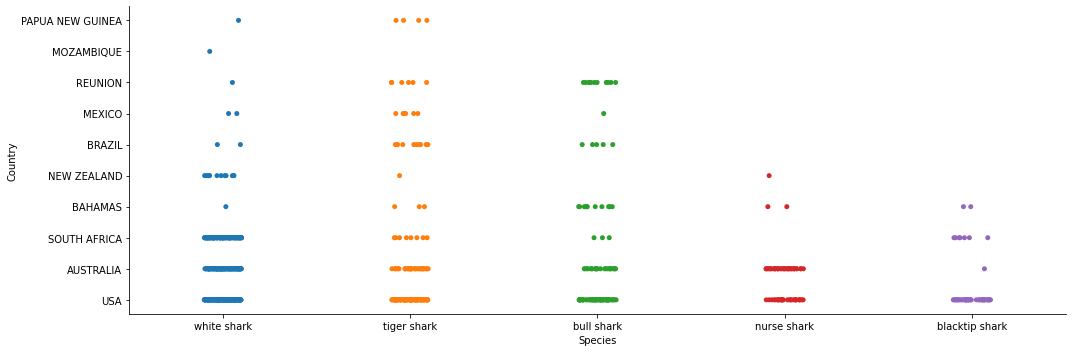

In [86]:
sns.catplot(x="Species", y="Country", data=atac_t10, aspect = 3)

10.  ¿Cuáles son los tipos de lesiones más comunes?

In [87]:
attacks['Injury'].value_counts().head(20)

FATAL                          190
Foot bitten                     49
Left foot bitten                43
Leg bitten                      31
Right foot bitten               29
No injury, board bitten         27
No injury                       25
Calf bitten                     15
Foot lacerated                  14
Right calf bitten               14
Lacerations to left foot        13
Lacerations to right foot       13
Thigh bitten                    13
FATAL, body not recovered       12
Lacerations to foot             12
No injury, surfboard bitten     10
Survived                        10
Right leg bitten                10
Arm bitten                       9
Hand bitten                      9
Name: Injury, dtype: int64

In [88]:
# Comparamos las lesiones de pies vs brazos
print ( 'Number of Foot injuries :', attacks.loc[attacks['Injury'].str.contains("Foot") | attacks['Injury'].str.contains("foot")]['Injury'].count())
print ( 'Number of Leg injuries :', attacks.loc[attacks['Injury'].str.contains("Leg") | attacks['Injury'].str.contains("leg")]['Injury'].count())
print ( 'Number of Arm injuries:', attacks.loc[attacks['Injury'].str.contains("Arm") | attacks['Injury'].str.contains("arm")]['Injury'].count())
print ( 'Number of Hand injuries:', attacks.loc[attacks['Injury'].str.contains("Hand") | attacks['Injury'].str.contains("hand")]['Injury'].count())

Number of Foot injuries : 546
Number of Leg injuries : 545
Number of Arm injuries: 338
Number of Hand injuries: 288


# Hipótesis
Limpios los datos y respondidas las preguntas básicas trabajamos con nuestra hipóstesis:

### "Los tiburones atacan mayormente a adolescentes"

¿Son el rango de edad con más ataques? 

In [89]:
#Para revisar esto, comenzamos buscando el promedio de edad de la victimas
attacks[attacks['Age']!=-1]['Age'].mean()

27.78182500938791

In [90]:
# ¿Cuál es el promedio de edad de las victimas según su sexo?
attacks = attacks[attacks['Age']!=-1]
attacks.groupby('Sex')['Age'].mean()

Sex
F             27.442971
Genderless    26.750000
M             27.841528
Name: Age, dtype: float64

In [91]:
# Como queremos trabajar la columna como categoría, más que como número, asignamos los valores a una categoría para poder trabajarlo mejor al momento de analizar 
attacks['Age range']= pd.cut (attacks.Age, bins = [0, 12,18, 25, 60, 99], labels = ['Child', 'Teenager', 'Young adult', 'Adult', 'Elder'])

In [92]:
attacks['Age range'].value_counts()

Adult          1145
Young adult     657
Teenager        590
Child           199
Elder            72
Name: Age range, dtype: int64

In [93]:
attacks['Age range'].value_counts(normalize=True)* 100

Adult          42.996620
Young adult    24.671423
Teenager       22.155464
Child           7.472775
Elder           2.703718
Name: Age range, dtype: float64

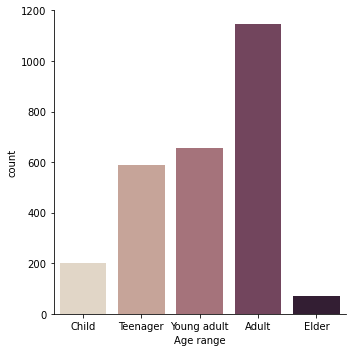

In [94]:
#attacks['Rango de edad'].plot.bar()
sns.catplot(x="Age range", kind="count", palette="ch:.25", data=attacks)

Con esto podemos concluir que los adultos y los adultos jóvenes son más atacados que los adolescentes

2. ¿Son los ataques a adolescentes más fatales?

In [95]:
attacks[["Age range", "Fatal (Y/N)"]].value_counts()

Age range    Fatal (Y/N)
Adult        N              948
Young adult  N              518
Teenager     N              477
Child        N              175
Adult        Y              161
Young adult  Y              117
Teenager     Y              103
Elder        N               49
             Y               18
Child        Y               14
Young adult  UNKNOWN          1
Adult        UNKNOWN          1
dtype: int64

In [96]:
attacks.groupby('Age range')["Fatal (Y/N)"].value_counts(normalize=True)* 100

Age range    Fatal (Y/N)
Child        N              92.592593
             Y               7.407407
Teenager     N              82.241379
             Y              17.758621
Young adult  N              81.446541
             Y              18.396226
             UNKNOWN         0.157233
Adult        N              85.405405
             Y              14.504505
             UNKNOWN         0.090090
Elder        N              73.134328
             Y              26.865672
Name: Fatal (Y/N), dtype: float64

<AxesSubplot:xlabel='Age range,Fatal (Y/N)'>

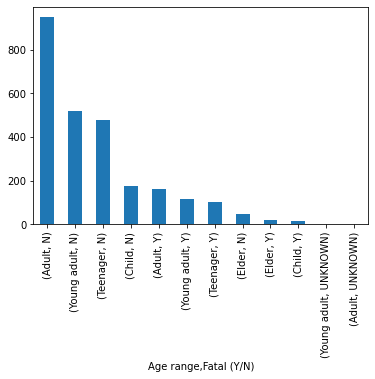

In [127]:
attacks[["Age range", "Fatal (Y/N)"]].value_counts().plot.bar()

In [97]:
# A pesar de que los adolescentes no son el grupo más atacado,
# su fatalidad es la tercera más alta (18.36%)

¿Los ataques en adolescentes se distribuyen igual entre hombres y mujeres?

In [98]:
attacks.groupby('Age range')["Sex"].value_counts()

Age range    Sex       
Child        M             142
             F              56
             Genderless      1
Teenager     M             490
             F              98
             Genderless      2
Young adult  M             593
             F              63
             Genderless      1
Adult        M             998
             F             143
             Genderless      4
Elder        M              55
             F              17
Name: Sex, dtype: int64

In [99]:
attacks.groupby('Age range')["Sex"].value_counts(normalize=True)* 100

Age range    Sex       
Child        M             71.356784
             F             28.140704
             Genderless     0.502513
Teenager     M             83.050847
             F             16.610169
             Genderless     0.338983
Young adult  M             90.258752
             F              9.589041
             Genderless     0.152207
Adult        M             87.161572
             F             12.489083
             Genderless     0.349345
Elder        M             76.388889
             F             23.611111
Name: Sex, dtype: float64

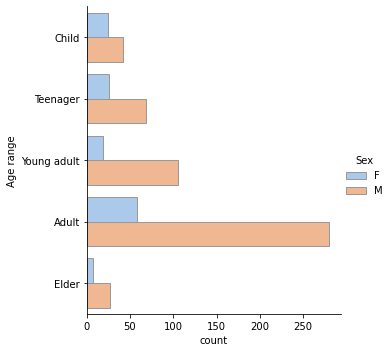

In [100]:
attacks_reciente = attacks[attacks['Decade']== "2010's"]

sns.catplot(y="Age range", hue="Sex", kind="count",
            palette="pastel", edgecolor=".6",
            data=attacks_reciente)

In [101]:
# Vemos que en todos los rangos de edad los hombres representan la mayoría de los ataques. Sin embargo, el porcentaje de mujeres tacadas es mayor en niños y ancianos y en tercer lugar las mujeres adolescentes

¿En qué actividad atacan más a los adolescentes?

In [102]:
attacks[attacks["Age range"] == "Teenager"]['Activity'].value_counts().head(20)

surf                                188
swim                                107
wade                                 27
stand                                24
spearfish                            19
body boarding                        16
body surf                            16
fish                                 15
boogie-board                         15
treading water                       11
swim                                  9
bathe                                 6
walk                                  4
scuba-dive                            4
snorkel                               4
free dive                             3
walk out of the water after surf      2
floating                              2
clamming                              2
fish from surf ski                    2
Name: Activity, dtype: int64

<AxesSubplot:xlabel='Activity,Age range'>

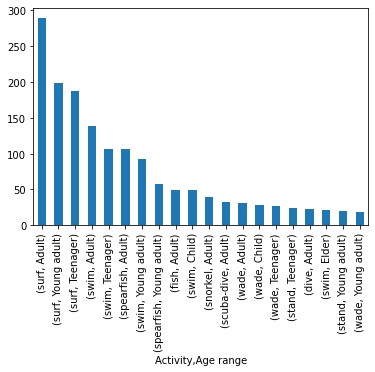

In [103]:
# Cómo están los adolescentes respecto al total de actividades y rango de edad:
attacks[['Activity', "Age range"]].value_counts().head(20).plot.bar()

¿Son los adolescentes igual de atacados en todos los países?

In [104]:
attacks[attacks["Age range"] == "Teenager"]['Country'].value_counts().head(20)

USA                 295
AUSTRALIA           132
SOUTH AFRICA         83
BRAZIL               11
NEW ZEALAND          11
REUNION               6
GREECE                4
BAHAMAS               4
GRENADA               3
MOZAMBIQUE            3
PANAMA                3
PAPUA NEW GUINEA      3
IRAQ                  3
NEW BRITAIN           2
CUBA                  2
EGYPT                 2
COLOMBIA              2
ITALY                 2
MEXICO                2
JAPAN                 1
Name: Country, dtype: int64

In [128]:
#Comparamos los ataques a adolescentes con el total de ataques por país
attacks_country= attacks['Country'].value_counts().head(20)
attacks_teen_country=attacks[attacks["Age range"] == "Teenager"]['Country'].value_counts().head(20)

Teen_c = pd.concat([attacks_country, attacks_teen_country], axis=1, )
Teen_c.columns = ['Total', 'Teens']
Teen_c

,Total,Teens
USA,1270.0,295.0
AUSTRALIA,569.0,132.0
SOUTH AFRICA,323.0,83.0
BAHAMAS,46.0,4.0
BRAZIL,40.0,11.0
NEW ZEALAND,37.0,11.0
REUNION,31.0,6.0
MEXICO,30.0,2.0
MOZAMBIQUE,20.0,3.0
PAPUA NEW GUINEA,20.0,3.0


USA Florida
AUSTRALIA New South Wales
SOUTH AFRICA Western Cape Province
BAHAMAS Abaco Islands
BRAZIL Pernambuco


<AxesSubplot:xlabel='Country,Area,Age range'>

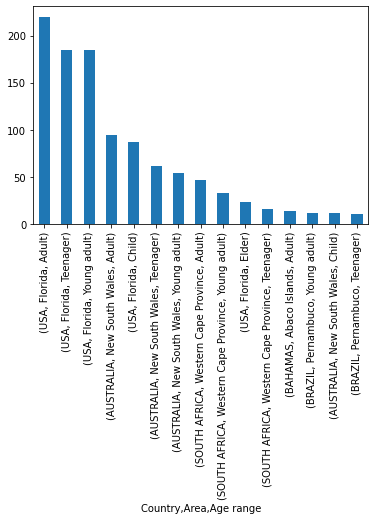

In [106]:
area_edad = attacks[['Country','Area', 'Age range']].value_counts()[:50]


paises = []
states = []

for i in area_edad.index:
    if i[0] not in paises:
        paises.append(i[0])
        states.append(i[1])
        print(i[0],i[1])

riesgo = area_edad[area_edad.index.isin(paises,level=0)&area_edad.index.isin(states,level=1)]
# filtrar la seria area_country por aquellos index que estan en paises y states
riesgo.head(20).plot.bar()

Lesiones más comunes en adolescentes

In [107]:
attacks[attacks["Age range"] == "Teenager"]['Injury'].value_counts().head(20)

FATAL                               38
Foot bitten                         17
Right foot bitten                    8
Leg bitten                           7
Left foot bitten                     7
Heel bitten                          6
FATAL, body not recovered            5
Foot lacerated                       5
Right calf bitten                    4
Laceration to left foot              4
Lacerations to foot                  4
Left calf bitten                     4
Lacerations to right foot            4
Right calf lacerated                 3
Leg bitten, surgically amputated     3
Survived                             3
Calf bitten                          3
Lacerations to lower leg             3
Elbow bitten                         2
Thigh bitten                         2
Name: Injury, dtype: int64

<AxesSubplot:>

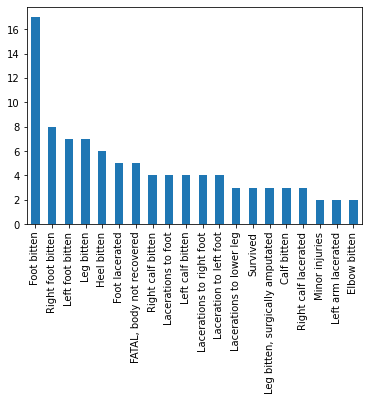

In [134]:
attacks[(attacks["Age range"] == "Teenager") & (attacks['Injury'] != "FATAL")]['Injury'].value_counts().head(20).plot.bar()

In [136]:
print ( 'Number of Foot injuries :', attacks.loc[(attacks["Age range"] == "Teenager") & attacks['Injury'].str.contains("Foot") | attacks['Injury'].str.contains("foot")]['Injury'].count())
print ( 'Number of Leg injuries :', attacks.loc[(attacks["Age range"] == "Teenager") & attacks['Injury'].str.contains("Leg") | attacks['Injury'].str.contains("leg")]['Injury'].count())
print ( 'Number of Arm injuries:', attacks.loc[(attacks["Age range"] == "Teenager") & attacks['Injury'].str.contains("Arm") | attacks['Injury'].str.contains("arm")]['Injury'].count())
print ( 'Number of Hand injuries:', attacks.loc[(attacks["Age range"] == "Teenager") & attacks['Injury'].str.contains("Hand") | attacks['Injury'].str.contains("hand")]['Injury'].count())

Number of Foot injuries : 448
Number of Leg injuries : 451
Number of Arm injuries: 286
Number of Hand injuries: 240


Los adolescentes provocan más los Ataques de tiburones

In [109]:
attacks[attacks["Age range"] == "Teenager"]['Type'].value_counts()

Unprovoked      540
Provoked         35
Invalid          11
Boat              3
Sea Disaster      1
Name: Type, dtype: int64

<AxesSubplot:>

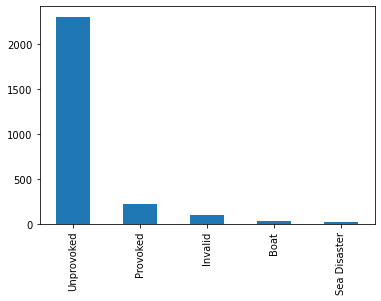

In [110]:
attacks['Type'].value_counts().plot.bar()

<AxesSubplot:>

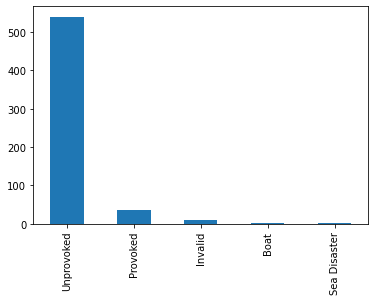

In [111]:
attacks[attacks["Age range"] == "Teenager"]['Type'].value_counts().plot.bar()


¿Cómo es la distribución temporal de los ataques a adolescentes? ¿Han aumentado los ataques en el tiempo?

In [112]:
attacks[(attacks["Age range"] == "Teenager") & (attacks['Hour']!= 0)]['Hour'].value_counts()

14    86
15    59
16    54
17    49
13    40
12    35
11    35
18    25
10    24
8     22
7     14
9     13
19     6
6      5
20     3
21     2
2      1
Name: Hour, dtype: int64

<AxesSubplot:>

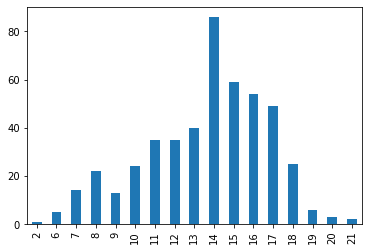

In [113]:
attacks[(attacks["Age range"] == "Teenager") & (attacks['Hour']!= 0)]['Hour'].value_counts(). sort_index().plot.bar()

In [114]:
#Mes
attacks[attacks["Age range"] == "Teenager"]['Month'].value_counts()

1     69
8     67
7     67
6     60
12    50
9     49
4     45
2     44
11    41
10    41
3     33
5     24
Name: Month, dtype: int64

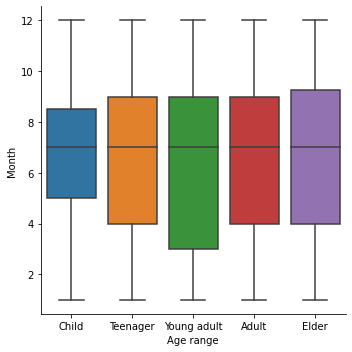

In [115]:
sns.catplot(y='Month', x="Age range", kind="box", data=attacks)

In [116]:
# Década
attacks[attacks["Age range"] == "Teenager"]['Decade'].value_counts()

00's         143
2010's        95
60's          71
90's          60
80's          58
50's          41
70's          37
40's          34
30's          23
20's          22
10's           4
Siglo XIX      0
Name: Decade, dtype: int64

<AxesSubplot:>

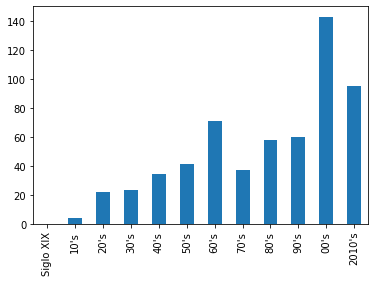

In [117]:
attacks[attacks["Age range"] == "Teenager"]['Decade'].value_counts(). sort_index().plot.bar()

Cuáles son las especies que más atacan a los adolescentes:

In [118]:
attacks[(attacks["Age range"] == "Teenager" )& (attacks['Species'] != 'unknown')]['Species'].value_counts().head(20)

white shark             65
tiger shark             33
bull shark              28
nurse shark             17
blacktip shark          16
small shark             16
4' shark                11
bronze whaler shark     11
1.8 m [6'] shark        10
6' shark                 8
1.5 m [5'] shark         8
1.2 m [4'] shark         7
raggedtooth shark        7
4' to 5' shark           6
reef shark               5
5' shark                 4
12' shark                4
3 m [10'] shark          4
3.7 m [12'] shark        3
unidentified species     3
Name: Species, dtype: int64

<AxesSubplot:>

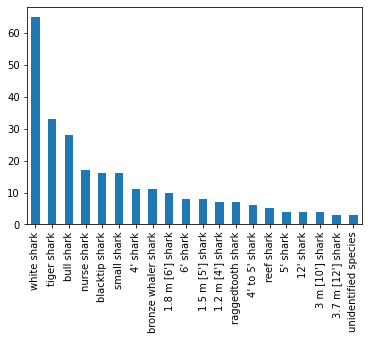

In [137]:
attacks[(attacks["Age range"] == "Teenager" )& (attacks['Species'] != 'unknown')]['Species'].value_counts().head(20).plot.bar()

# CONCLUSIONES
"Los adolescentes no son el grupo de edad más atacado. Y en la mayoría de las variables los datos se distribuyen igual que en la totalidad de ataques"